# Discente: **Jean Carlos de Carvalho Costa**

# Experimento: Cross-Entropy Loss com Softmax

Este experimento demonstra o uso da função Softmax e a evolução da perda de entropia cruzada ao longo de várias iterações. O objetivo é minimizar a entropia por meio de perturbações gaussianas nos logits iniciais.

Vamos explorar o seguinte processo:

1. Definição das funções principais: Softmax e Cross-Entropy Loss.
2. Inicialização de logits aleatórios e labels one-hot.
3. Cálculo inicial da perda e aplicação do Softmax.
4. Aplicação iterativa de perturbações gaussianas para minimizar a entropia.
5. Visualização da evolução da entropia.


In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Configurações iniciais
np.random.seed()  # Define a semente baseada no relógio do sistema

def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Função para calcular a perda de entropia cruzada
def cross_entropy_loss(probs, labels):
    return -np.sum(labels * np.log(probs), axis=1)

# Função para gerar variações nos logits
def generate_variations(original_logits, noise_level):
    return [np.random.normal(loc=original_logits, scale=noise_level) for _ in range(4)]

In [21]:
def initialize():
    num_samples = 3
    num_classes = 3
    # logits = np.random.uniform(0.1, 3.0, (num_samples, num_classes))
    logits = np.array([[2.5, 0.3, 2.1],
        [1.2, 2.4, 0.1],
        [0.8, 0.5, 3.0]])
    labels = np.eye(num_classes)  # Rótulos one-hot encoded
    return logits, labels

logits, labels = initialize()
print("Logits iniciais:")
print(logits)
print("\nLabels (one-hot encoded):")
print(labels)

Logits iniciais:
[[2.5 0.3 2.1]
 [1.2 2.4 0.1]
 [0.8 0.5 3. ]]

Labels (one-hot encoded):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Visualização Inicial

Aqui estão os logits gerados aleatoriamente e os rótulos one-hot. Agora, aplicaremos o Softmax para calcular as probabilidades.


In [22]:
# Aplica Softmax e calcula a perda inicial
probs = softmax(logits)
loss_per_sample = cross_entropy_loss(probs, labels)

print("Probabilidades iniciais:")
print(probs)

print("\nPerda de entropia cruzada por amostra:")
print(loss_per_sample)

print("\nPerda média inicial:")
print(loss_per_sample.mean())


Probabilidades iniciais:
[[0.56144347 0.06220971 0.37634682]
 [0.21491566 0.71354513 0.07153921]
 [0.09288646 0.06881198 0.83830156]]

Perda de entropia cruzada por amostra:
[0.57724418 0.3375096  0.17637739]

Perda média inicial:
0.36371038786807586


In [23]:
labels

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Variações nos Logits

A cada iteração, geramos novas versões dos logits originais com pequenas alterações aleatórias (ruído). Essas variações ajudam a explorar melhores soluções.

1. **Logits Originais:** Mantidos como referência.
2. **Variações Geradas:** Aplicamos pequenas alterações gaussianas.
3. **Seleção:** Escolhemos o conjunto com menor entropia para a próxima iteração.

In [24]:
# Configuração para as variações
noise_level = 0.5

# Gera variações e calcula perdas
variations = generate_variations(logits, noise_level)
all_logit_sets = [logits] + variations
all_losses = []

for variation_logits in all_logit_sets:
    probs = softmax(variation_logits)
    loss = cross_entropy_loss(probs, labels)
    all_losses.append(loss.mean())

# Seleciona o conjunto com menor perda
sorted_indices = np.argsort(all_losses)
logits = all_logit_sets[sorted_indices[0]]

print("Perda média após a seleção da melhor variação:")
print(all_losses[sorted_indices[0]])


Perda média após a seleção da melhor variação:
0.18903066878638597


In [25]:
all_logit_sets

[array([[2.5, 0.3, 2.1],
        [1.2, 2.4, 0.1],
        [0.8, 0.5, 3. ]]),
 array([[ 2.37679031, -0.16236922,  1.83308511],
        [ 2.26591817,  2.86654262, -0.2938961 ],
        [ 1.18115071,  0.97450881,  2.43458237]]),
 array([[2.28499119, 0.26819231, 1.96122376],
        [1.09196599, 2.23300108, 0.03493805],
        [0.59440816, 0.6953249 , 3.23061367]]),
 array([[ 3.64727298,  0.03429463,  2.1307398 ],
        [ 1.14913237,  2.89423445,  0.26962398],
        [ 0.70236118, -0.12175525,  3.07401721]]),
 array([[ 2.63066853, -0.48149698,  2.18268548],
        [ 0.49061296,  2.44542251,  0.10080793],
        [ 1.10977407,  0.6955538 ,  2.46642316]])]

In [26]:
# Processo iterativo
num_iterations = 30
entropy_evolution = []

logits, labels = initialize()

for iteration in range(num_iterations):
    probs_original = softmax(logits)
    loss_per_sample = cross_entropy_loss(probs_original, labels)
    variations = generate_variations(logits, noise_level)

    all_logit_sets = [logits] + variations
    all_losses = []

    for variation_logits in all_logit_sets:
        probs = softmax(variation_logits)
        loss = cross_entropy_loss(probs, labels)
        all_losses.append(loss.mean())

    sorted_indices = np.argsort(all_losses)
    logits = all_logit_sets[sorted_indices[0]]
    entropy_evolution.append(all_losses[sorted_indices[0]])

print("Iterações concluídas.")


Iterações concluídas.


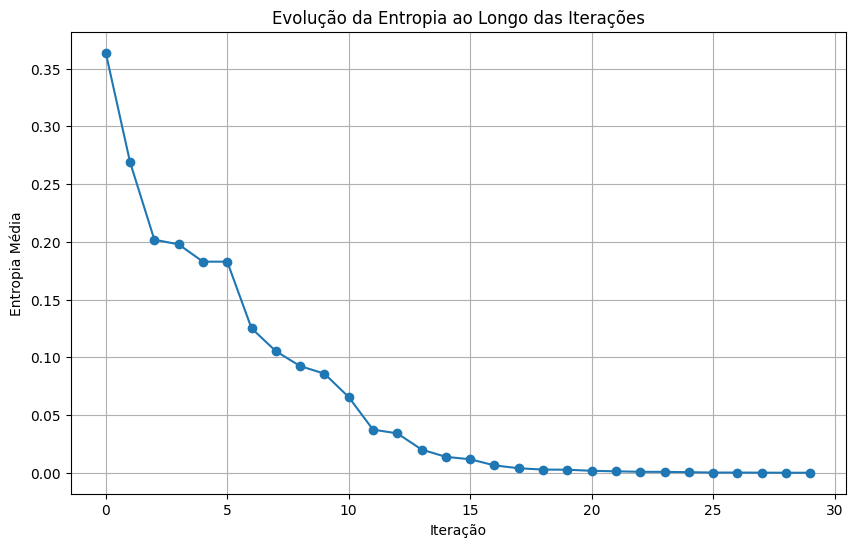

In [27]:
# Visualização da evolução da entropia
plt.figure(figsize=(10, 6))
plt.plot(entropy_evolution, marker='o')
plt.title('Evolução da Entropia ao Longo das Iterações')
plt.xlabel('Iteração')
plt.ylabel('Entropia Média')
plt.grid()
plt.show()
